In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from astropy.cosmology import WMAP9

In [9]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=20), plt.rc('ytick', labelsize=20)
plt.rcParams['savefig.dpi'] = 150
plt.rc('text',usetex=True)

## replenishment/mass growth estimate

1077.880548610296


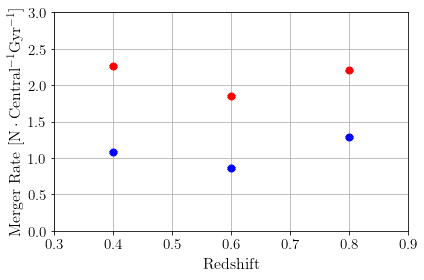

In [73]:
def merger_rate(z1,z2):
    n_sat_merge = np.array([])
    path = 'CUT_deep_catalogs/number_counts/'
    for cat_name in ['COSMOS_deep','ELAIS_deep','DEEP_deep','XMM-LSS_deep','SXDS_uddd']:
        n_sat_merge = np.append(n_sat_merge,np.genfromtxt(path+'number_sathist_merge_'+cat_name+'_'+str(z1)+'.txt'))
    return np.average(n_sat_merge)/(WMAP9.lookback_time(z1).value - WMAP9.lookback_time(z2).value)

def repl_rate(z1,z2):
    path = 'CUT_deep_catalogs/number_counts/'
    all_n_sat_z1 = np.array([])
    all_n_sat_z2 = np.array([])
    for cat_name in ['COSMOS_deep','ELAIS_deep','DEEP_deep','XMM-LSS_deep','SXDS_uddd']:
        all_n_sat_z1 = np.append(all_n_sat_z1,np.genfromtxt(path+'number_sathist_'+cat_name+'_'+str(z1)+'.txt'))
        all_n_sat_z2 = np.append(all_n_sat_z2,np.genfromtxt(path+'number_sathist_'+cat_name+'_'+str(z2)+'.txt'))
        
    n_merge_rate = merger_rate(z1,z2)
    repl_rate = n_merge_rate + np.average(all_n_sat_z2)-np.average(all_n_sat_z1)
    print(np.average(all_n_sat_z2),np.average(all_n_sat_z1))
    return repl_rate

def mass_growth_rate(z1,z2):
    path = 'CUT_deep_catalogs/number_counts/'
    mass_grow = np.array([])
    for cat_name in ['COSMOS_deep','ELAIS_deep','DEEP_deep','XMM-LSS_deep','SXDS_uddd']:
        mass_grow = np.append(mass_grow,np.genfromtxt(path+'mass_sathist_'+cat_name+'_'+str(z1)+'.txt'))
    return np.average(mass_grow)/(WMAP9.lookback_time(z1).value - WMAP9.lookback_time(z2).value)

   
plt.errorbar(0.4,merger_rate(0.4,0.2),0.013,fmt='or',capsize=4,ms=7)
plt.errorbar(0.6,merger_rate(0.6,0.4),0.015,fmt='or',capsize=4,ms=7)
plt.errorbar(0.8,merger_rate(0.8,0.6),0.009,fmt='or',capsize=4,ms=7)

plt.errorbar(0.4,mass_growth_rate(0.4,0.2)/1000.,0.013,fmt='ob',capsize=4,ms=7)
plt.errorbar(0.6,mass_growth_rate(0.6,0.4)/1000.,0.015,fmt='ob',capsize=4,ms=7)
plt.errorbar(0.8,mass_growth_rate(0.8,0.6)/1000.,0.009,fmt='ob',capsize=4,ms=7)

plt.xlabel('Redshift',fontsize=16)
plt.ylabel('Merger Rate [$\mathrm{N\cdot Central^{-1} Gyr^{-1}}$]',fontsize=16)
# plt.legend(fontsize=15)
plt.grid()
plt.xlim([0.3,0.9])
plt.ylim([0,3])
plt.tight_layout()
plt.savefig('figures/merger_rate.png',dpi=150)
plt.show()

In [96]:
def combine_deep_smf3(ssfq, prefix,affix,z):
    
    smf = np.load(path+'smf_'+prefix+'_COSMOS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf1 = np.load(path+'smf_'+prefix+'_DEEP_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf2 = np.load(path+'smf_'+prefix+'_ELAIS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf3 = np.load(path+'smf_'+prefix+'_XMM-LSS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf4 = np.load(path+'smf_'+prefix+'_SXDS_uddd_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    return smf+smf1+smf2+smf3+smf4

[ 1.44439784e+04  1.00695201e+04 -1.35715582e+04 -2.29288542e+03
  8.38324219e+02  2.13993341e+03  3.48469637e+03  3.37728897e+03
  2.85978968e+03  2.39966583e+03  2.36272003e+03  1.74986287e+03
  1.35715963e+03  1.16350260e+03  1.24929196e+03  7.87574606e+02
  4.38122238e+02  9.63590403e+01  3.00000000e+00  0.00000000e+00]
[-1.00094334e+04 -1.42181281e+05 -1.38115445e+05 -7.51898298e+04
 -4.12542139e+04 -2.46728131e+04 -1.46438809e+04 -1.00146768e+04
 -6.80762518e+03 -4.92078620e+03 -3.66262611e+03 -3.06852554e+03
 -2.57310090e+03 -2.27982107e+03 -1.85696017e+03 -1.14256354e+03
 -3.54008000e+02  1.31718241e+01  0.00000000e+00  0.00000000e+00]


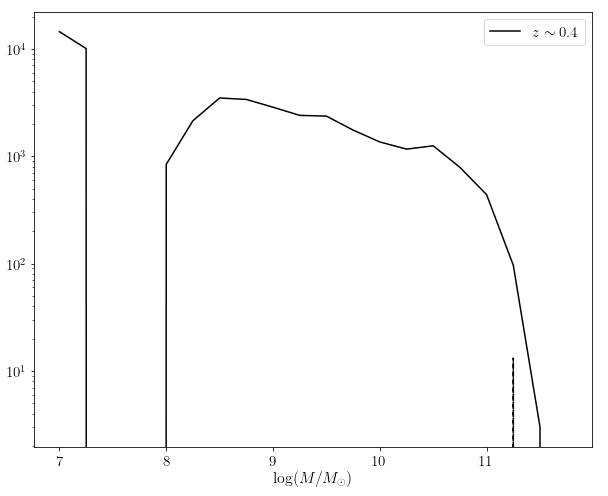

In [98]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 1, figsize=(10,8))

path = 'CUT_deep_catalogs/test_smf/'
bin_edges = np.load(path+'bin_edges.npy')[:-1]

#load data
all_60 = combine_deep_smf3('all','60kpc',z='0.4',affix = '_new')
all_lt60 = combine_deep_smf3('all','lessthan_60kpc',z='0.4',affix = '_new')

print(all_60)
print(all_lt60)
# all
axs.plot(bin_edges, all_60,'k',label='$z\sim0.4$')
axs.plot(bin_edges, all_lt60,'--k')

axs.set_yscale('log')
axs.legend(fontsize=15)

fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('$\log(M/M_\odot)$', fontsize=16)
plt.show()

## AplPy test

In [24]:
import aplpy

/Users/lejay/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


INFO: Auto-setting vmax to  6.284e+02 [aplpy.core]


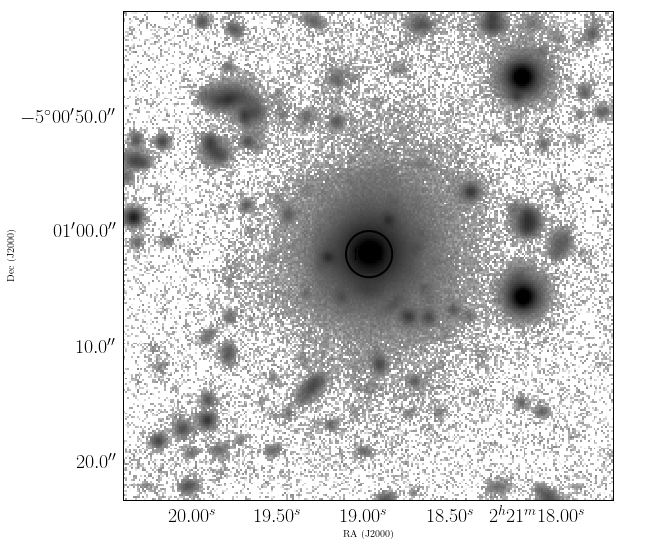

In [62]:
fig=aplpy.FITSFigure('CUT_deep_catalogs/test.fits')
fig.show_grayscale(stretch='log',vmin=0.1,invert=True)
fig.add_label(35.32905969514562, -5.01725845902161,'fdfd',fontsize=20,color='k')
fig.show_circles(35.32905969514562, -5.01725845902161, 2./3600,linewidth=2,color='k')